In [1]:
import matplotlib.pyplot as plt
from scipy.signal import resample
import glob, os, fileinput
from glob import glob
import numpy as np

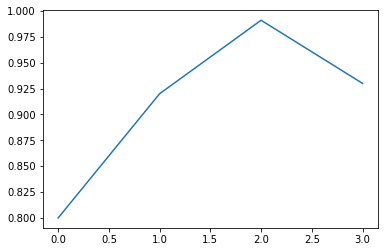

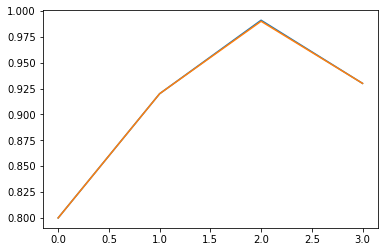

[0.4, 0.46, 0.5, 0.46]


In [34]:
#percentages for resnet
x = [0.8, 0.92, 0.991, 0.93]
#x = [0.8, 0.92, 0.93, 0.94, 0.95, 0.99, 0.99, 0.93]
plt.plot(x)
plt.show()
y = resample(x,4)
plt.plot(y)
y = [round(elem,2) for elem in y]
plt.plot(y)
plt.show()
y = list(np.array(y)*0.5)
y = [round(elem,2) for elem in y]
print(y)

In [3]:
# batch change configs
root_dir = '../configs'
os.chdir(root_dir)
replace = False
rem_bak = False
bak_to_ini = False
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        path = os.path.join(subdir, file)
        if replace:
            with fileinput.FileInput(path, inplace=True, backup='.bak') as file:
                for line in file:
                    print(line.replace("'/media/lorenz/Volume/code/msc/pytorch-admm-pruning/logfiles/'", 
                                       "/media/lorenz/Volume/code/msc/pytorch-admm-pruning/logfiles/"),  end='')

        if rem_bak:
            if '.bak' in path:
                os.remove(path) 
        
        if bak_to_ini:
            if '.bak' in path:
                with open(path, 'r') as file :
                      filedata = file.read()

                print(path)
                path = path.replace('.bak', '')

                with open(path, 'w') as file:
                    file.write(filedata)
        

In [25]:
# batch delete pngs
import sys
import os
import glob

main_dir = '/media/lorenz/Volume/code/msc/pytorch-admm-pruning/logfiles/'

folders = os.listdir(main_dir)

for (dirname, dirs, files) in os.walk(main_dir):
    for file in files:
        if file.endswith('.png'):
            source_file = os.path.join(dirname, file)
            os.remove(source_file)